Author : Anirudh Sathish 
Roll No : CS20B1125 
Assignment 3 

Import neccesary libraries 

In [1]:
import cv2 
import numpy as np 
import matplotlib.pyplot as plt 

Take Lena , Convert to GreyScale 

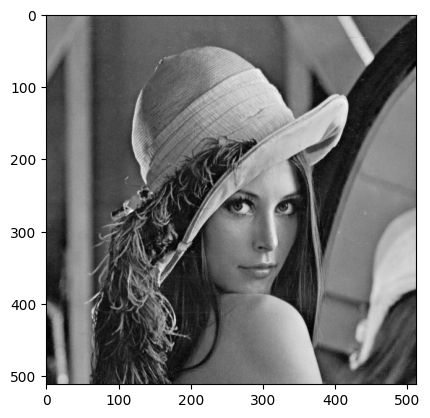

In [2]:
img = cv2.imread("Lena.png")
img_RGB = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
img_Gray = cv2.cvtColor(img_RGB,cv2.COLOR_BGR2GRAY)
plt.imshow(img_Gray,cmap="gray")
plt.show()

Let us look at the original size of the image 

In [3]:
size = img_Gray.shape
print(size)

(512, 512)


Downsample the image 

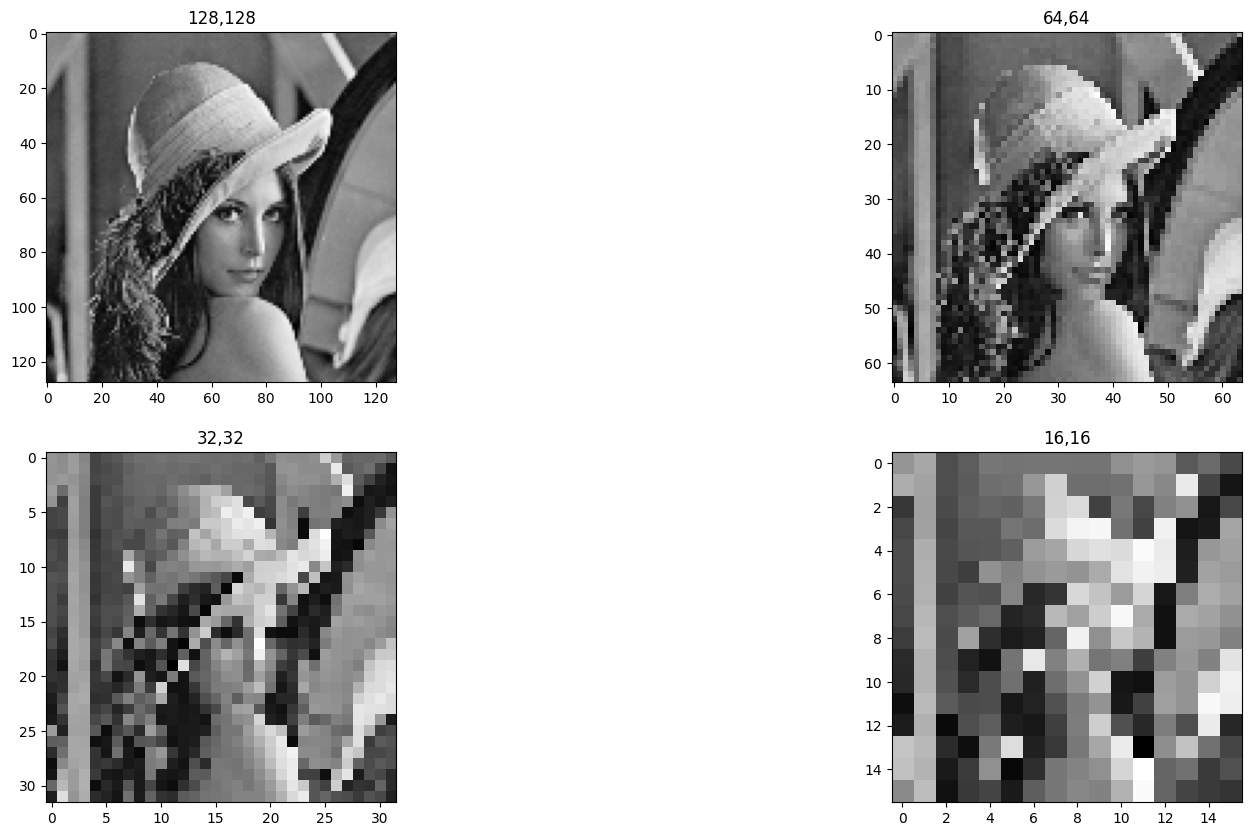

In [4]:
shapeList = [128,64,32,16]
plt.figure(figsize = (20,10))
imageList = []
for i in range(len(shapeList)):
    img_ = cv2.resize(img_Gray,(shapeList[i],shapeList[i]))
    imageList.append(img_)
for i in range(len(imageList)):
    plt.subplot(2,2,i+1)
    plt.imshow(imageList[i],cmap="gray")
    title = str(shapeList[i])+","+str(shapeList[i])
    plt.title(title)
plt.show()

We can see that as went went down the number of dimension , we lost a lot of orginal information . There is a significant amount of information loss . In the (128*128) , Lena can be identified ,but it is not the same as (256*256) ,(64*64) even more features get blurred . At 32*32 , we can identify there is a person , but the face is blurred . IN (16*16) , identification is really difficult . Here aliasing has taken place 

Down sampling the grey scale image into 8 different intensity bands 

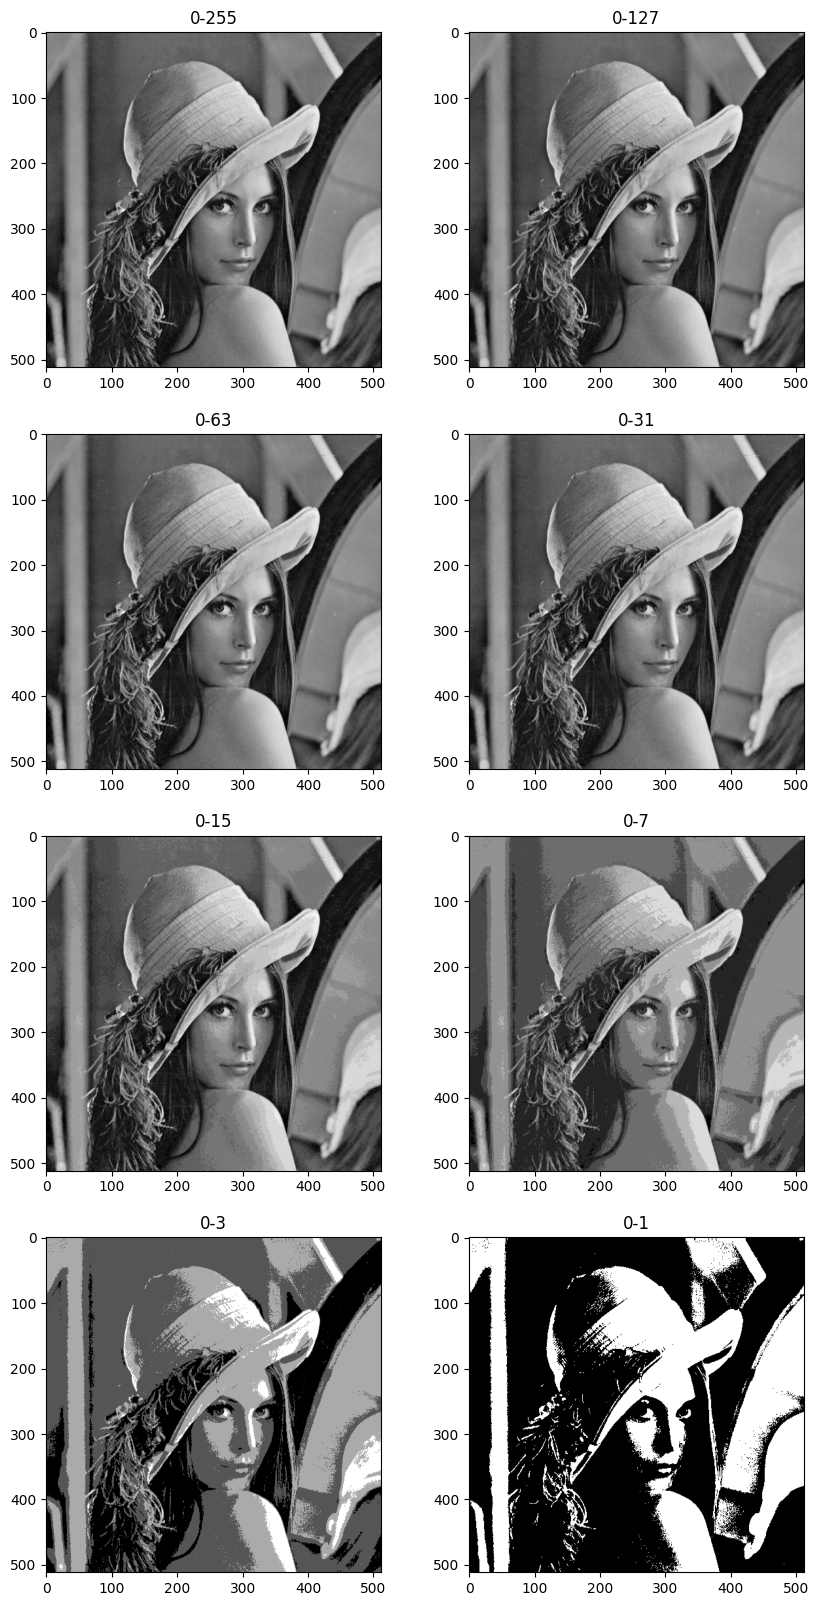

In [5]:
downSamplingFactors = [1,2,4,8,16,32,64,128]
down_imgList = []
for i in downSamplingFactors:
    img_sampleDown = np.ceil(img_Gray/i)
    img_sampleDown = img_sampleDown.astype(int)
    down_imgList.append(img_sampleDown)
plt.figure(figsize=(10,20))
for i in range(len(down_imgList)):
    plt.subplot(4,2,i+1)
    plt.imshow(down_imgList[i],cmap= "gray")
    title = str(0)+"-"+str(int(256/downSamplingFactors[i])-1)
    plt.title(title)
plt.show()

With the reduction in the greyscale levels , there has been a reduction in contrast , coming down to binary in the last image . This is an example of false contouring 